# Query based Sentiment Analysis using Python

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a Twitter App

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'yzxNyCyjkVJJrpNY0L3AphSVV'
CONSUMER_SECRET = 'e7xhbuIqTM520PCtwGrSrSIXWyrQbH7ckr9s0ToOlQE6tek4OP'

# Access:
ACCESS_TOKEN  = '2186056028-BPexxHqPrML7hcvwIuLfX3itD8IZPqguuksDHtn'
ACCESS_SECRET = 'vvhbgIqa7jK5nBAO9P4Mh1MTFvJdWH3Fl5bbzGhai9Dah'

In [3]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
extractor = twitter_setup()
trends1 = extractor.trends_place(1) # from the end of your code
# trends1 is a list with only one element in it, which is a 
# dict which we'll put in data.
data = trends1[0] 
# grab the trends
trends = data['trends']
# grab the name from each trend
names = [trend['name'] for trend in trends]
# put all the names together with a ' ' separating them
trendsName = "\n".join(names)
print(trendsName)

#تفطر_كبده
#عطنا_تغريده_حلوه
#الخميس_الونيس
#INDvWI
#Yankees
최종범
Botafogo
Batman'da 4
Şehitlerimize Allah'tan
Dudu
Stanton
新型スイッチ
Roberto Madrazo
新型Switch
Marielle
신나라
#مع_او_ضد_الكذب
#EXOT9_ComingSoon
#BapakHoaxNasional
#ThursdayThoughts
#perşembe
#AHSApocalpyse
#天使の日
#dierendag
#WithYou
#يوم_المعلم
#RaiEnCrisis
#DiaMundialRBD14Años
#WorldAnimalDay
#المطلق_يوصي_بالتعدد
#NationalPoetryDay
#4ottobre
#あなたの善と悪の割合
#OTDirecto4OCT
#CopaMX
#SeríaShingónTuitear
#NOTAfromTomorrow
#TTyapılırUcuza
#DancingBrasil
#Canucks
#LiveTheAILife
#BeşiktaşınMaçıVar
#RIPKamaru
#Rohingyas
#QuintaDetremuraSDV
#TGIDFTrailer
#HayvanlarıKorumaGünü
#あなたに似ているアニメのキャラクター
#Sensex
#DaleAlboHastaElFinal


In [5]:
query="INDvWI" # Enter user or query

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list based on query:
tweets = extractor.search(q=query, count=100)

# We create a tweet list based on user
#tweets = extractor.user_timeline(screen_name=query, count=100)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

5 recent tweets:

RT @ICC: Congratulations to @PrithviShaw on receiving his first Test cap from captain @imVkohli. 👏👏

#INDvWI https://t.co/hk6uE0ZLby

RT @pramz: Fifty on Test debut for Prithvi Shaw. Who's surprised? #INDvWI

RT @cricbuzz: Holder is understood to have sustained the injury in Dubai where Windies assembled for pre-series training #INDvWI

https://t…

@PrithviShaw bright future awaits you mam 
#PrithviShaw 
#INDvWI

CONGRATULATIONS!!
#PrithviShaw hits a brilliant half century on Test debut against #WestIndies. #INDvWI



In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @ICC: Congratulations to @PrithviShaw on re...
1,RT @pramz: Fifty on Test debut for Prithvi Sha...
2,RT @cricbuzz: Holder is understood to have sus...
3,@PrithviShaw bright future awaits you mam \n#P...
4,CONGRATULATIONS!!\n#PrithviShaw hits a brillia...
5,RT @cricketaakash: Day 1 - Here we go!\n#lovem...
6,RT @BCCI: Test Cap No. 293: @PrithviShaw's dre...
7,RT @SampathStats: Geoff Parker (AUS U19 in 198...
8,Future of US-#Pakistan relations rests upon pr...
9,Holder’s absence a blow to visitors’ fast bowl...


In [8]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


# Adding relevant info to our dataframe

In [9]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['Language'] = np.array([tweet.lang for tweet in tweets])


In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Language
0,RT @ICC: Congratulations to @PrithviShaw on re...,132,1047738657518448641,2018-10-04 06:42:16,Twitter for Android,0,261,en
1,RT @pramz: Fifty on Test debut for Prithvi Sha...,73,1047738654305615872,2018-10-04 06:42:15,Twitter for Android,0,1,en
2,RT @cricbuzz: Holder is understood to have sus...,140,1047738653810688000,2018-10-04 06:42:15,Twitter for Android,0,5,en
3,@PrithviShaw bright future awaits you mam \n#P...,64,1047738651898204160,2018-10-04 06:42:15,Twitter for Android,1,0,en
4,CONGRATULATIONS!!\n#PrithviShaw hits a brillia...,103,1047738649570410501,2018-10-04 06:42:14,Twitter for Android,0,0,en
5,RT @cricketaakash: Day 1 - Here we go!\n#lovem...,140,1047738644084056064,2018-10-04 06:42:13,Twitter for Android,0,9,en
6,RT @BCCI: Test Cap No. 293: @PrithviShaw's dre...,100,1047738641206923264,2018-10-04 06:42:12,Twitter for Android,0,491,en
7,RT @SampathStats: Geoff Parker (AUS U19 in 198...,140,1047738640837701632,2018-10-04 06:42:12,Twitter Lite,0,21,en
8,Future of US-#Pakistan relations rests upon pr...,136,1047738640116469760,2018-10-04 06:42:12,Twitter Web Client,0,0,en
9,Holder’s absence a blow to visitors’ fast bowl...,82,1047738638539350016,2018-10-04 06:42:12,IFTTT,0,0,en


In [11]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 119.83


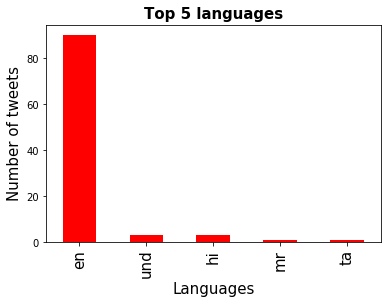

In [12]:
tweets_by_lang = data['Language'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [13]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Before Rajkot, the last time West Indies played a Test in India, Sachin Tendulkar bowed out of international cricke… https://t.co/olYilH49cx
Number of likes: 33
140 characters.

The tweet with more retweets is: 
RT @BCCI: Test Cap No. 293: @PrithviShaw's dream come true moment 🙌

#INDvWI https://t.co/cPMiR1tLwW
Number of retweets: 491
100 characters.



# Time series of Tweets

In [14]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

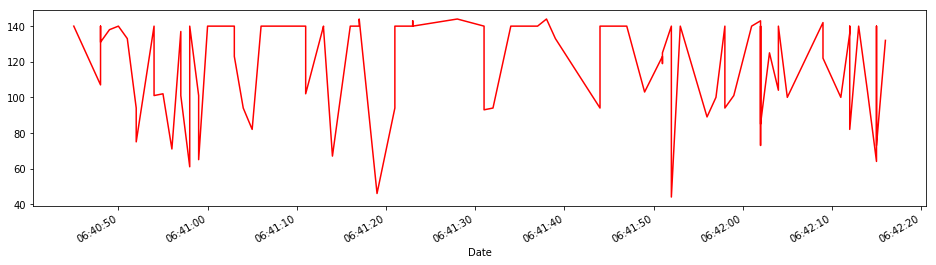

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

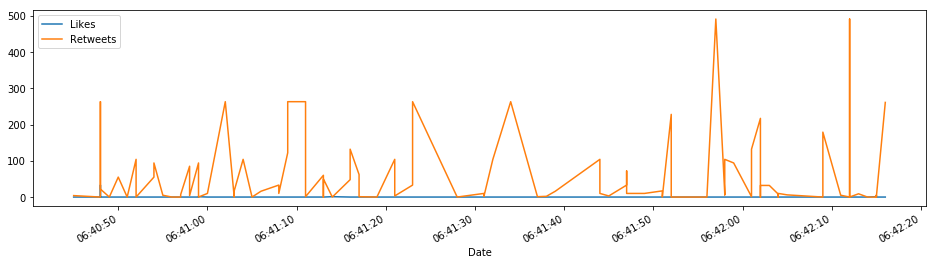

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Pie charts of sources

In [17]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Lite
* Twitter Web Client
* IFTTT
* Twitter for iPhone
* CW Live Cricket Scores
* CricketKhabarLive
* CricketNDTVLive
* Nikkusharma
* TweetDeck


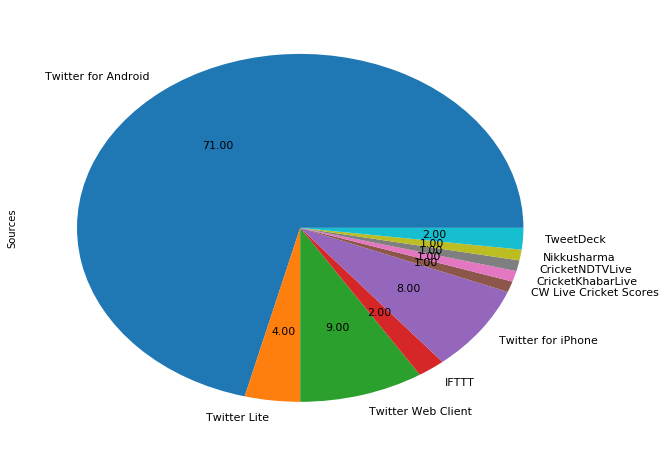

In [18]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10,8));

# Sentiment analysis

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Language,SA
0,RT @ICC: Congratulations to @PrithviShaw on re...,132,1047738657518448641,2018-10-04 06:42:16,Twitter for Android,0,261,en,1
1,RT @pramz: Fifty on Test debut for Prithvi Sha...,73,1047738654305615872,2018-10-04 06:42:15,Twitter for Android,0,1,en,1
2,RT @cricbuzz: Holder is understood to have sus...,140,1047738653810688000,2018-10-04 06:42:15,Twitter for Android,0,5,en,0
3,@PrithviShaw bright future awaits you mam \n#P...,64,1047738651898204160,2018-10-04 06:42:15,Twitter for Android,1,0,en,1
4,CONGRATULATIONS!!\n#PrithviShaw hits a brillia...,103,1047738649570410501,2018-10-04 06:42:14,Twitter for Android,0,0,en,1
5,RT @cricketaakash: Day 1 - Here we go!\n#lovem...,140,1047738644084056064,2018-10-04 06:42:13,Twitter for Android,0,9,en,0
6,RT @BCCI: Test Cap No. 293: @PrithviShaw's dre...,100,1047738641206923264,2018-10-04 06:42:12,Twitter for Android,0,491,en,1
7,RT @SampathStats: Geoff Parker (AUS U19 in 198...,140,1047738640837701632,2018-10-04 06:42:12,Twitter Lite,0,21,en,1
8,Future of US-#Pakistan relations rests upon pr...,136,1047738640116469760,2018-10-04 06:42:12,Twitter Web Client,0,0,en,0
9,Holder’s absence a blow to visitors’ fast bowl...,82,1047738638539350016,2018-10-04 06:42:12,IFTTT,0,0,en,1


In [21]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [22]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 32.0%
Percentage of neutral tweets: 61.0%
Percentage of negative tweets: 7.0%


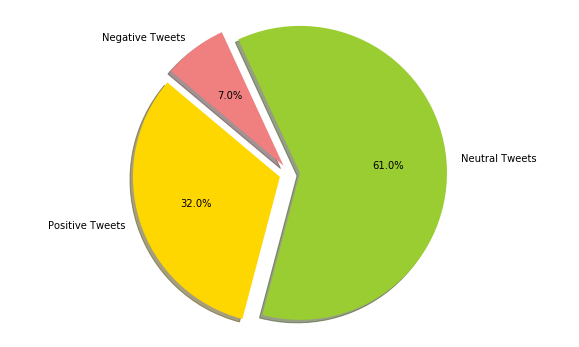

In [23]:

# Data to plot
labels = 'Positive Tweets', 'Neutral Tweets','Negative Tweets'
sizes = [len(pos_tweets)*100/len(data['Tweets']), len(neu_tweets)*100/len(data['Tweets']), len(neg_tweets)*100/len(data['Tweets'])]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.07, 0.07, 0.07)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()